<a href="https://colab.research.google.com/github/lukamodric28/Crop-Yield-App/blob/main/Crop_Yield_Science_Fair_2025_2026_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")
crop_yield = pd.read_csv("/content/drive/MyDrive/Crop_Yield_Dataset/crop_yield_science_fair_2025_2026_dataset.csv")

Mounted at /content/drive


In [ ]:
print("FIRST FIVE ROWS")
print(crop_yield.head(5))
print()
print("INFO ABOUT NON-NULL VAUES, D-TYPE, ETC")
print(crop_yield.info())
print()
print("PROVIDES STATISTICAL AND CATEGORICAL DATA")
print(crop_yield.describe(include="all"))

FIRST FIVE ROWS
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  

INFO ABOUT NON-NULL VAUES, D-TYPE, ETC
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         -------

In [ ]:
print("REMOVING AND CHANGING CERTAIN COLUMN NAMES AND THEIR ORDER")
crop_yield.drop("Unnamed: 0", axis=1, inplace=True, errors = "ignore")
crop_yield.rename(columns = {"Area":"Country", "Item":"Crop", "pesticides_tonnes":"pesticides_in_tons_used", "average_rain_fall_mm_per_year":"average_rainfall_in_mm_per_year"}, inplace=True)
crop_yield = crop_yield.reindex(columns = ["Country", "Crop", "Year", "average_rainfall_in_mm_per_year", "pesticides_in_tons_used", "avg_temp", "hg/ha_yield"])
print(crop_yield)

REMOVING AND CHANGING CERTAIN COLUMN NAMES AND THEIR ORDER
        Country            Crop  Year  average_rainfall_in_mm_per_year  \
0       Albania           Maize  1990                           1485.0   
1       Albania        Potatoes  1990                           1485.0   
2       Albania     Rice, paddy  1990                           1485.0   
3       Albania         Sorghum  1990                           1485.0   
4       Albania        Soybeans  1990                           1485.0   
...         ...             ...   ...                              ...   
28237  Zimbabwe     Rice, paddy  2013                            657.0   
28238  Zimbabwe         Sorghum  2013                            657.0   
28239  Zimbabwe        Soybeans  2013                            657.0   
28240  Zimbabwe  Sweet potatoes  2013                            657.0   
28241  Zimbabwe           Wheat  2013                            657.0   

       pesticides_in_tons_used  avg_temp  hg/ha_yiel

/tmp/ipython-input-153165138.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.subplot(323).set_xticklabels(["0", "0", "50", "100", "150", "200", "250", "300", "350"])


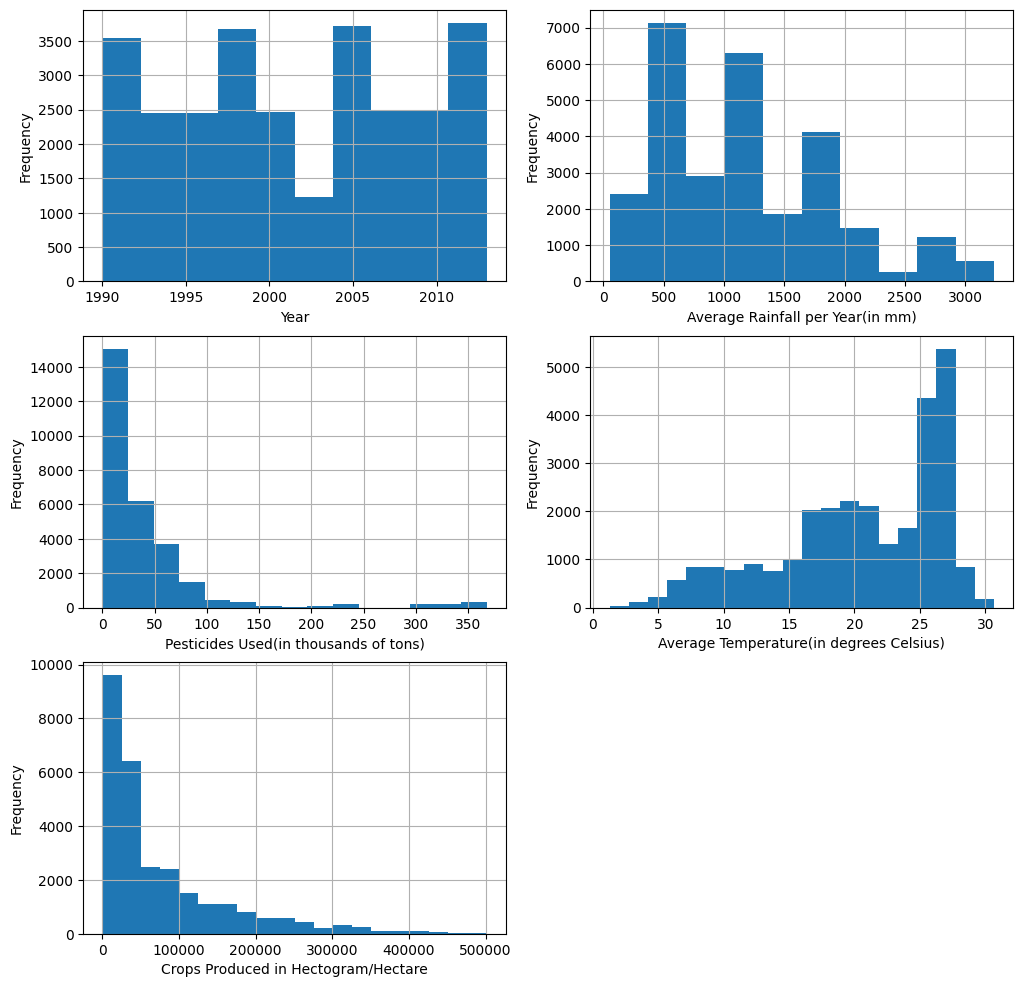

In [ ]:
plt.figure(1, figsize=(12,12))
plt.subplot(321)
crop_yield["Year"].hist(bins=10)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.subplot(322)
crop_yield["average_rainfall_in_mm_per_year"].hist(bins=10)
plt.xlabel("Average Rainfall per Year(in mm)")
plt.ylabel("Frequency")
plt.subplot(323)
crop_yield["pesticides_in_tons_used"].hist(bins=15)
plt.subplot(323).set_xticklabels(["0", "0", "50", "100", "150", "200", "250", "300", "350"])
plt.xlabel("Pesticides Used(in thousands of tons)")
plt.ylabel("Frequency")
plt.subplot(324)
crop_yield["avg_temp"].hist(bins=20)
plt.xlabel("Average Temperature(in degrees Celsius)")
plt.ylabel("Frequency")
plt.subplot(325)
crop_yield["hg/ha_yield"].hist(bins=20)
plt.xlabel("Crops Produced in Hectogram/Hectare")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-4216274030.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.subplot(323).set_xticklabels(["0", "0", "50", "100", "150", "200", "250", "300", "350"])


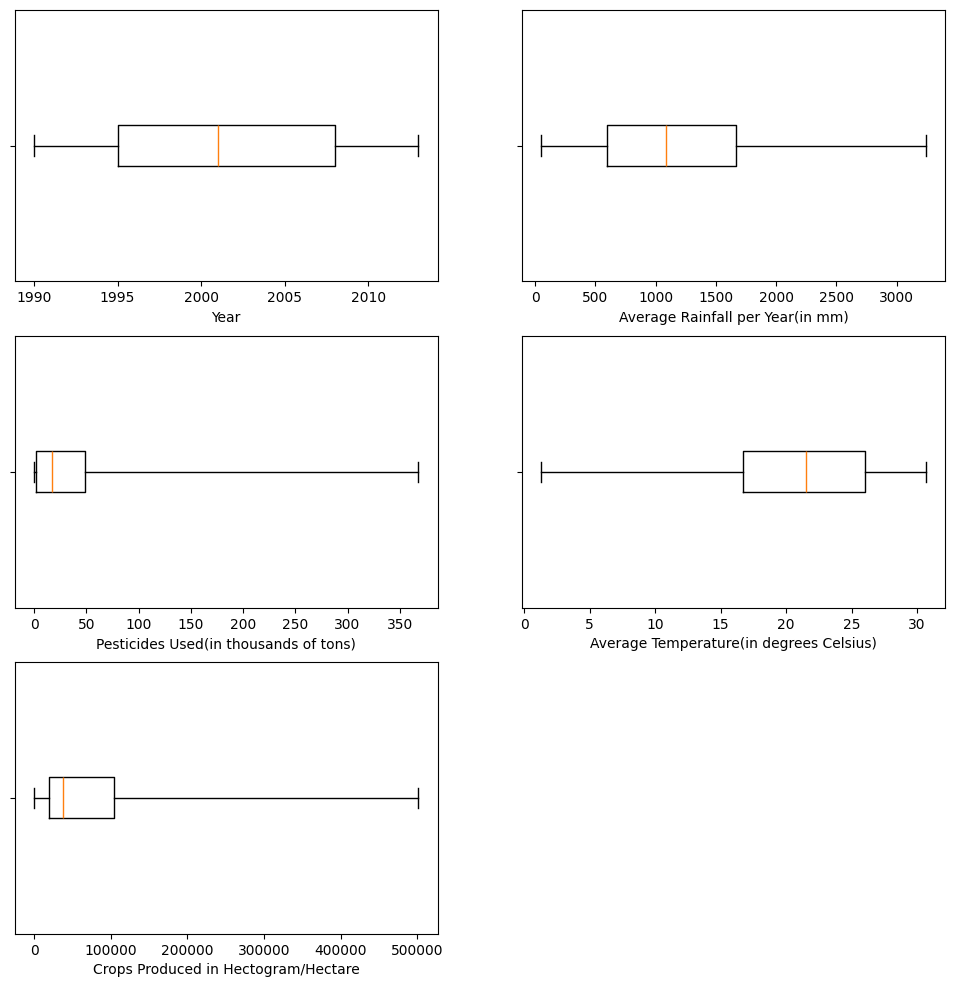

In [ ]:
plt.figure(1, figsize=(12, 12))
plt.subplot(321)
plt.tick_params(axis="y", labelleft = False)
plt.boxplot(crop_yield["Year"], vert = False, whis = [0,100])
plt.xlabel("Year")
plt.subplot(322)
plt.tick_params(axis="y", labelleft = False)
plt.boxplot(crop_yield["average_rainfall_in_mm_per_year"], vert = False, whis = [0,100])
plt.xlabel("Average Rainfall per Year(in mm)")
plt.subplot(323)
plt.subplot(323).set_xticklabels(["0", "0", "50", "100", "150", "200", "250", "300", "350"])
plt.tick_params(axis="y", labelleft = False)
plt.boxplot(crop_yield["pesticides_in_tons_used"], vert=False, whis=[0,100])
plt.xlabel("Pesticides Used(in thousands of tons)")
plt.subplot(324)
plt.tick_params(axis="y", labelleft = False)
plt.boxplot(crop_yield["avg_temp"], vert=False, whis = [0,100])
plt.xlabel("Average Temperature(in degrees Celsius)")
plt.subplot(325)
plt.tick_params(axis="y", labelleft = False)
plt.boxplot(crop_yield["hg/ha_yield"], vert=False, whis = [0,100])
plt.xlabel("Crops Produced in Hectogram/Hectare")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
crop_yield["pesticides_bin"] = pd.qcut(crop_yield["pesticides_in_tons_used"], q=15, labels=False)
crop_yield["avg_temp_bin"] = pd.qcut(crop_yield["avg_temp"], q=20, labels=False)
crop_yield["strat_key"] = crop_yield["pesticides_bin"].astype(str) + "_" + crop_yield["avg_temp_bin"].astype(str)
crop_yield_train, crop_yield_test = train_test_split(crop_yield, test_size=0.2, stratify = crop_yield["strat_key"], random_state=42)
for i in ["pesticides_bin", "avg_temp_bin", "strat_key"]:
  crop_yield_train = crop_yield_train.drop(i, axis=1)
  crop_yield_test = crop_yield_test.drop(i, axis=1)

print(crop_yield_train)
print()
print(crop_yield_test)

            Country      Crop  Year  average_rainfall_in_mm_per_year  \
19246        Mexico     Maize  1994                            758.0   
7593        Ecuador   Cassava  1995                           2274.0   
8077        Ecuador     Wheat  2013                           2274.0   
6874       Colombia   Sorghum  2010                           3240.0   
4147         Brazil     Maize  2007                           1761.0   
...             ...       ...   ...                              ...   
4526         Brazil   Cassava  2011                           1761.0   
24162  Saudi Arabia   Sorghum  1991                             59.0   
857       Australia  Potatoes  1991                            534.0   
1810        Austria     Maize  1999                           1110.0   
14376         India   Cassava  2013                           1083.0   

       pesticides_in_tons_used  avg_temp  hg/ha_yield  
19246                 34468.93     21.46        22255  
7593                   

hg/ha_yield                        1.000000
Year                               0.088078
pesticides_in_tons_used            0.064004
average_rainfall_in_mm_per_year    0.002421
avg_temp                          -0.115073
Name: hg/ha_yield, dtype: float64




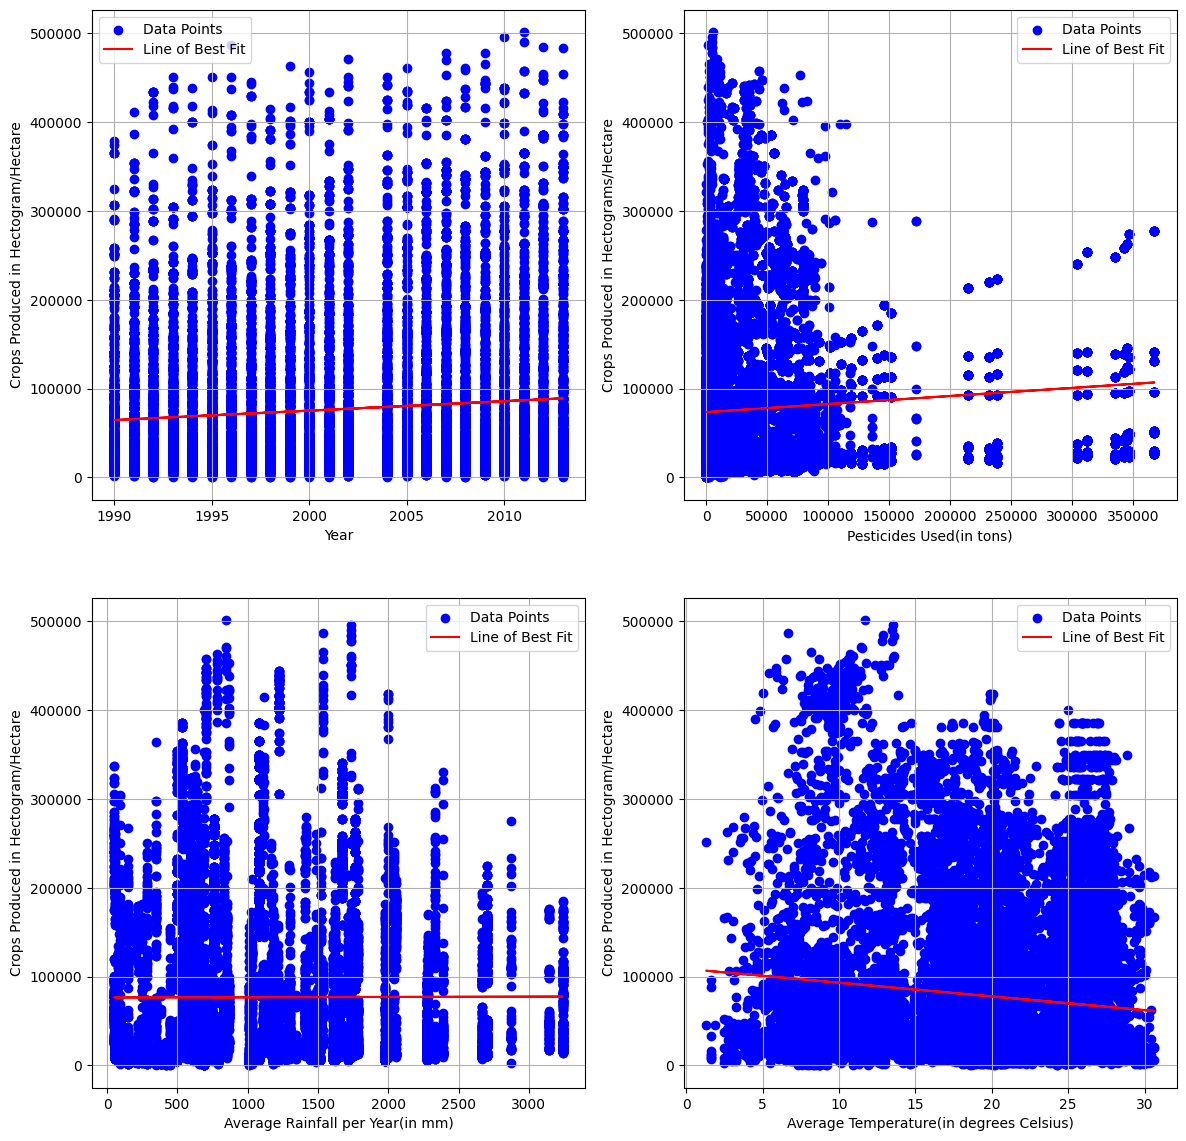

In [ ]:
crop_yield_train_2 = crop_yield_train.copy()
crop_yield_test_2 = crop_yield_test.copy()
crop_yield_train_2["Year"] = crop_yield_train_2["Year"].clip(lower = 1990, upper = 2013)
crop_yield_test_2["Year"] = crop_yield_test_2["Year"].clip(lower = 1990, upper = 2013)
corr_values = crop_yield_train_2.corr(numeric_only=True)
print(corr_values["hg/ha_yield"].sort_values(ascending=False))
print()
print()

from sklearn.linear_model import LinearRegression
plt.figure(1, figsize=(14,14))
plt.subplot(221)
crop_yield_train_2_year_numpy_array = (crop_yield_train_2["Year"].to_numpy()).reshape(-1,1)
crop_yield_train_2_yield_numpy_array = crop_yield_train_2["hg/ha_yield"].to_numpy()
model = LinearRegression()
model.fit(crop_yield_train_2_year_numpy_array, crop_yield_train_2_yield_numpy_array)
crop_yield_train_2_yield_numpy_array_pred = model.predict(crop_yield_train_2_year_numpy_array)
plt.scatter(crop_yield_train_2_year_numpy_array, crop_yield_train_2_yield_numpy_array, color='blue', label='Data Points')
plt.plot(crop_yield_train_2_year_numpy_array, crop_yield_train_2_yield_numpy_array_pred, color = "red", label = "Line of Best Fit")
plt.xlabel("Year")
plt.ylabel("Crops Produced in Hectogram/Hectare")
plt.grid(True)
plt.legend()

plt.subplot(222)
crop_yield_train_2_pesticides_used_numpy_array = (crop_yield_train_2["pesticides_in_tons_used"].to_numpy()).reshape(-1,1)
model.fit(crop_yield_train_2_pesticides_used_numpy_array, crop_yield_train_2_yield_numpy_array)
crop_yield_train_2_yield_numpy_array_pred_2 = model.predict(crop_yield_train_2_pesticides_used_numpy_array)
plt.scatter(crop_yield_train_2_pesticides_used_numpy_array, crop_yield_train_2_yield_numpy_array, color="blue", label="Data Points")
plt.plot(crop_yield_train_2_pesticides_used_numpy_array, crop_yield_train_2_yield_numpy_array_pred_2, color = "red", label = "Line of Best Fit")
plt.xlabel("Pesticides Used(in tons)")
plt.ylabel("Crops Produced in Hectograms/Hectare")
plt.grid(True)
plt.legend()

plt.subplot(223)
crop_yield_train_2_avg_rainfall_numpy_array = (crop_yield_train_2["average_rainfall_in_mm_per_year"].to_numpy()).reshape(-1,1)
model.fit(crop_yield_train_2_avg_rainfall_numpy_array, crop_yield_train_2_yield_numpy_array)
crop_yield_train_2_yield_numpy_array_pred_3 = model.predict(crop_yield_train_2_avg_rainfall_numpy_array)
plt.scatter(crop_yield_train_2_avg_rainfall_numpy_array, crop_yield_train_2_yield_numpy_array, color = "blue", label = "Data Points")
plt.plot(crop_yield_train_2_avg_rainfall_numpy_array, crop_yield_train_2_yield_numpy_array_pred_3, color = "red", label = "Line of Best Fit")
plt.xlabel("Average Rainfall per Year(in mm)")
plt.ylabel("Crops Produced in Hectogram/Hectare")
plt.grid(True)
plt.legend()

plt.subplot(224)
crop_yield_train_2_avg_temp_numpy_array = (crop_yield_train_2["avg_temp"].to_numpy()).reshape(-1,1)
model.fit(crop_yield_train_2_avg_temp_numpy_array, crop_yield_train_2_yield_numpy_array)
crop_yield_train_2_yield_numpy_array_pred_4 = model.predict(crop_yield_train_2_avg_temp_numpy_array)
plt.scatter(crop_yield_train_2_avg_temp_numpy_array, crop_yield_train_2_yield_numpy_array, color = "blue", label = "Data Points")
plt.plot(crop_yield_train_2_avg_temp_numpy_array, crop_yield_train_2_yield_numpy_array_pred_4, color = "red", label = "Line of Best Fit")
plt.xlabel("Average Temperature(in degrees Celsius)")
plt.ylabel("Crops Produced in Hectogram/Hectare")
plt.grid(True)
plt.legend()
plt.show()

hg/ha_yield                        1.000000
Year                               0.088078
pesticides_in_tons_used            0.064004
pesticides_temperature             0.042322
rainfall_pesticides                0.041723
average_rainfall_in_mm_per_year    0.002421
rainfall_temperature              -0.043692
avg_temp                          -0.115073
Name: hg/ha_yield, dtype: float64


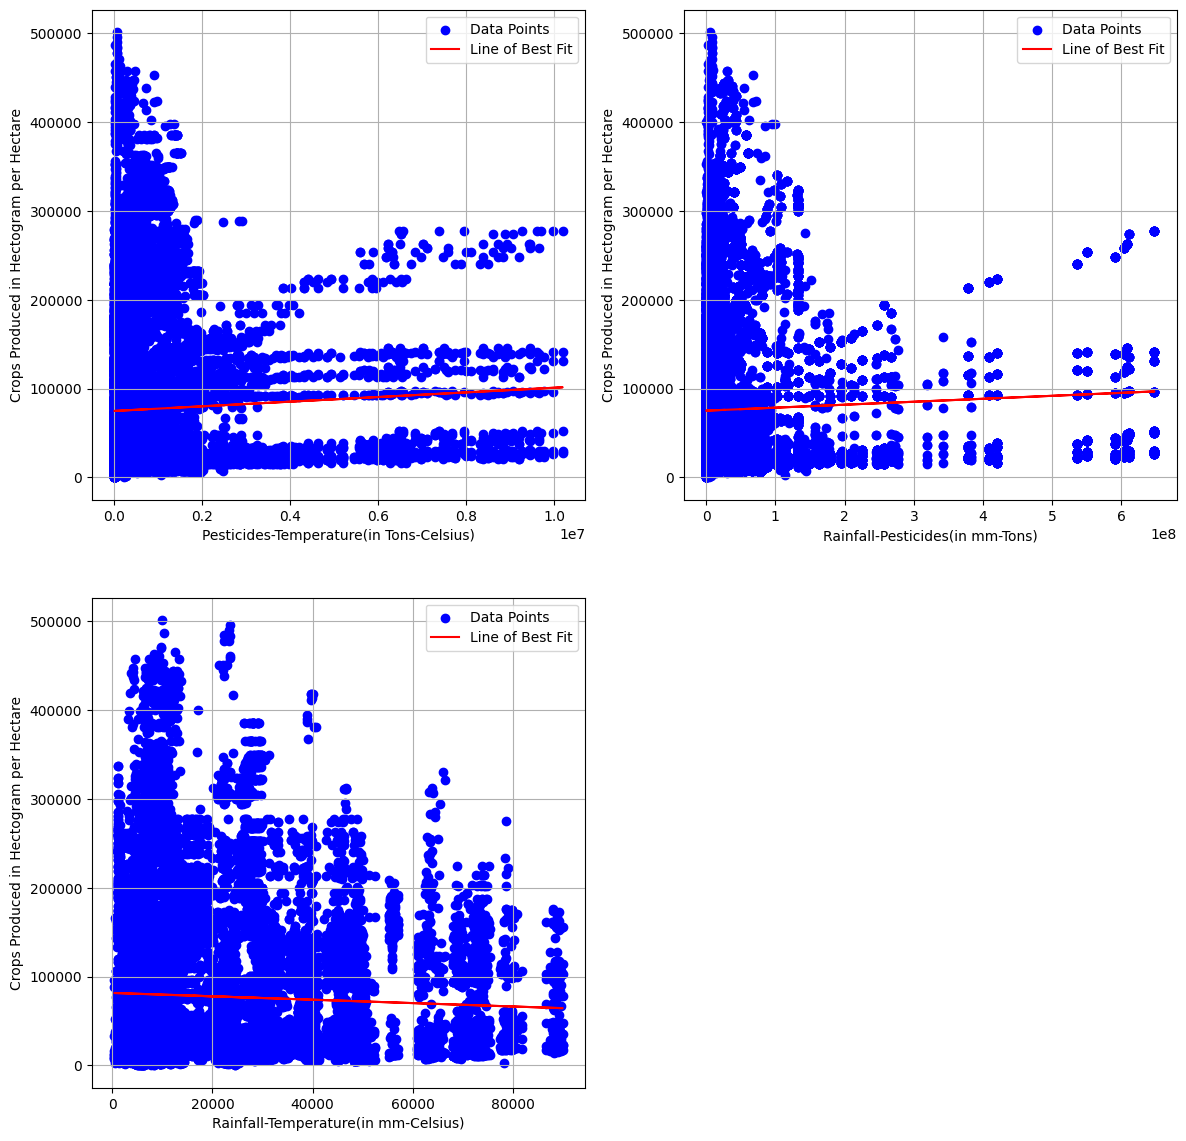

In [ ]:
crop_yield_train_2["rainfall_temperature"] = (crop_yield_train_2["average_rainfall_in_mm_per_year"]) * (crop_yield_train_2["avg_temp"])
crop_yield_train_2["pesticides_temperature"] = (crop_yield_train_2["pesticides_in_tons_used"]) * (crop_yield_train_2["avg_temp"])
crop_yield_train_2["rainfall_pesticides"] = (crop_yield_train_2["average_rainfall_in_mm_per_year"]) * (crop_yield_train_2["pesticides_in_tons_used"])
corr_values = crop_yield_train_2.corr(numeric_only=True)
print(corr_values["hg/ha_yield"].sort_values(ascending=False))

from sklearn.linear_model import LinearRegression
plt.figure(1, figsize=(14,14))
plt.subplot(221)
crop_yield_train_2_pesticides_temperature_numpy_array = (crop_yield_train_2["pesticides_temperature"].to_numpy()).reshape(-1,1)
model.fit(crop_yield_train_2_pesticides_temperature_numpy_array, crop_yield_train_2_yield_numpy_array)
crop_yield_train_2_yield_numpy_array_pred_5 = model.predict(crop_yield_train_2_pesticides_temperature_numpy_array)
plt.scatter(crop_yield_train_2_pesticides_temperature_numpy_array, crop_yield_train_2_yield_numpy_array, color = "blue", label = "Data Points")
plt.plot(crop_yield_train_2_pesticides_temperature_numpy_array, crop_yield_train_2_yield_numpy_array_pred_5, color = "red", label = "Line of Best Fit")
plt.xlabel("Pesticides-Temperature(in Tons-Celsius)")
plt.ylabel("Crops Produced in Hectogram per Hectare")
plt.grid(True)
plt.legend()

plt.subplot(222)
crop_yield_train_2_rainfall_pesticides_numpy_array = (crop_yield_train_2["rainfall_pesticides"].to_numpy()).reshape(-1,1)
model.fit(crop_yield_train_2_rainfall_pesticides_numpy_array, crop_yield_train_2_yield_numpy_array)
crop_yield_train_2_yield_numpy_array_6 = model.predict(crop_yield_train_2_rainfall_pesticides_numpy_array)
plt.scatter(crop_yield_train_2_rainfall_pesticides_numpy_array, crop_yield_train_2_yield_numpy_array, color = "blue", label = "Data Points")
plt.plot(crop_yield_train_2_rainfall_pesticides_numpy_array, crop_yield_train_2_yield_numpy_array_6, color = "red", label = "Line of Best Fit")
plt.xlabel("Rainfall-Pesticides(in mm-Tons)")
plt.ylabel("Crops Produced in Hectogram per Hectare")
plt.grid(True)
plt.legend()

plt.subplot(223)
crop_yield_train_2_rainfall_temperature_numpy_array = (crop_yield_train_2["rainfall_temperature"].to_numpy()).reshape(-1,1)
model.fit(crop_yield_train_2_rainfall_temperature_numpy_array, crop_yield_train_2_yield_numpy_array)
crop_yield_train_2_yield_numpy_array_7 = model.predict(crop_yield_train_2_rainfall_temperature_numpy_array)
plt.scatter(crop_yield_train_2_rainfall_temperature_numpy_array, crop_yield_train_2_yield_numpy_array, color = "blue", label = "Data Points")
plt.plot(crop_yield_train_2_rainfall_temperature_numpy_array, crop_yield_train_2_yield_numpy_array_7, color = "red", label = "Line of Best Fit")
plt.xlabel("Rainfall-Temperature(in mm-Celsius)")
plt.ylabel("Crops Produced in Hectogram per Hectare")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
crop_yield_train_2.drop("hg/ha_yield", axis=1, errors ="ignore", inplace=True)
crop_yield_train_2_labels = crop_yield_train["hg/ha_yield"].copy()

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
crop_yield_train_2_polynomial_features = poly_features.fit_transform(crop_yield_train_2[["rainfall_temperature", "rainfall_pesticides"]])
crop_yield_train_2_polynomial_features_cols = poly_features.get_feature_names_out(["rainfall_temperature", "rainfall_pesticides"])
crop_yield_train_2_polynomial_features_wanted_cols = crop_yield_train_2_polynomial_features_cols[2:]
crop_yield_train_2[crop_yield_train_2_polynomial_features_wanted_cols] = crop_yield_train_2_polynomial_features[:, 2:]
crop_yield_train_2.rename(columns = {"rainfall_temperature rainfall_pesticides" : "rainfall_temperature*rainfall_pesticides"}, inplace=True)
print(crop_yield_train_2)

            Country      Crop  Year  average_rainfall_in_mm_per_year  \
19246        Mexico     Maize  1994                            758.0   
7593        Ecuador   Cassava  1995                           2274.0   
8077        Ecuador     Wheat  2013                           2274.0   
6874       Colombia   Sorghum  2010                           3240.0   
4147         Brazil     Maize  2007                           1761.0   
...             ...       ...   ...                              ...   
4526         Brazil   Cassava  2011                           1761.0   
24162  Saudi Arabia   Sorghum  1991                             59.0   
857       Australia  Potatoes  1991                            534.0   
1810        Austria     Maize  1999                           1110.0   
14376         India   Cassava  2013                           1083.0   

       pesticides_in_tons_used  avg_temp  rainfall_temperature  \
19246                 34468.93     21.46              16266.68   
759

In [ ]:
crop_yield_train_2_country_cats = crop_yield_train_2[["Country"]]
crop_yield_train_2_crop_type_cats = crop_yield_train_2[["Crop"]]
print(crop_yield_train_2_country_cats.nunique())
print(crop_yield_train["Country"].nunique())
print()
print(crop_yield_train_2_crop_type_cats.nunique())
print(crop_yield_train["Crop"].nunique())
print()

from sklearn.preprocessing import OneHotEncoder
country_one_hot_encoder = OneHotEncoder()
crop_yield_train_2_country_cat_1_hot_encoded = country_one_hot_encoder.fit_transform(crop_yield_train_2_country_cats)
print(crop_yield_train_2_country_cat_1_hot_encoded)
print()
print()
print(country_one_hot_encoder.categories_)
print()
print()

crop_type_one_hot_encoder = OneHotEncoder()
crop_yield_train_2_crop_type_cat_1_hot_encoded = crop_type_one_hot_encoder.fit_transform(crop_yield_train_2_crop_type_cats)
print(crop_yield_train_2_crop_type_cat_1_hot_encoded)
print()
print()
print(crop_type_one_hot_encoder.categories_)

Country    101
dtype: int64
101

Crop    10
dtype: int64
10

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 22593 stored elements and shape (22593, 101)>
  Coords	Values
  (0, 62)	1.0
  (1, 26)	1.0
  (2, 26)	1.0
  (3, 22)	1.0
  (4, 14)	1.0
  (5, 88)	1.0
  (6, 94)	1.0
  (7, 27)	1.0
  (8, 26)	1.0
  (9, 77)	1.0
  (10, 5)	1.0
  (11, 36)	1.0
  (12, 48)	1.0
  (13, 42)	1.0
  (14, 43)	1.0
  (15, 97)	1.0
  (16, 86)	1.0
  (17, 73)	1.0
  (18, 62)	1.0
  (19, 61)	1.0
  (20, 62)	1.0
  (21, 42)	1.0
  (22, 42)	1.0
  (23, 22)	1.0
  (24, 42)	1.0
  :	:
  (22568, 15)	1.0
  (22569, 25)	1.0
  (22570, 42)	1.0
  (22571, 62)	1.0
  (22572, 80)	1.0
  (22573, 42)	1.0
  (22574, 14)	1.0
  (22575, 49)	1.0
  (22576, 90)	1.0
  (22577, 73)	1.0
  (22578, 62)	1.0
  (22579, 33)	1.0
  (22580, 97)	1.0
  (22581, 41)	1.0
  (22582, 37)	1.0
  (22583, 62)	1.0
  (22584, 62)	1.0
  (22585, 96)	1.0
  (22586, 81)	1.0
  (22587, 56)	1.0
  (22588, 14)	1.0
  (22589, 81)	1.0
  (22590, 5)	1.0
  (22591, 6)	1.0
  (22592, 42)	1

In [ ]:
print(crop_yield_train_2["Year"].skew())
print(crop_yield_train_2["pesticides_in_tons_used"].skew())
print(crop_yield_train_2["avg_temp"].skew())
print(crop_yield_train_2["average_rainfall_in_mm_per_year"].skew())
print(crop_yield_train_2["rainfall_temperature"].skew())
print(crop_yield_train_2["rainfall_pesticides"].skew())
print(crop_yield_train_2["pesticides_temperature"].skew())
print(crop_yield_train_2["rainfall_temperature^2"].skew())
print(crop_yield_train_2["rainfall_temperature*rainfall_pesticides"].skew())
print(crop_yield_train_2["rainfall_pesticides^2"].skew())
print()
print()

pesticides_temperature_log = np.log1p(crop_yield_train_2["pesticides_temperature"])
rainfall_temperature_log = np.log1p(crop_yield_train_2["rainfall_temperature"])
rainfall_pesticides_log = np.log1p(crop_yield_train_2["rainfall_pesticides"])
pesticides_in_tons_used_log = np.log1p(crop_yield_train_2["pesticides_in_tons_used"])
rainfall_temperature_squared_log = np.log1p(crop_yield_train_2["rainfall_temperature^2"])
rainfall_temperature_times_rainfall_pesticides_log = np.log1p(crop_yield_train_2["rainfall_temperature*rainfall_pesticides"])
rainfall_pesticides_squared_log = np.log1p(crop_yield_train_2["rainfall_pesticides^2"])

from sklearn.preprocessing import RobustScaler
pesticides_scaler = RobustScaler()
crop_yield_train_2_pesticides_in_tons_used_scaled = pesticides_scaler.fit_transform(pesticides_in_tons_used_log.values.reshape(-1,1))

year_scaler = RobustScaler()
crop_yield_train_2_year_scaled = year_scaler.fit_transform(crop_yield_train_2["Year"].values.reshape(-1,1))

avg_rainfall_scaler = RobustScaler()
crop_yield_train_2_avg_rainfall_scaled = avg_rainfall_scaler.fit_transform(crop_yield_train_2["average_rainfall_in_mm_per_year"].values.reshape(-1,1))

avg_temp_scaler = RobustScaler()
crop_yield_train_2_avg_temp_scaled = avg_temp_scaler.fit_transform(crop_yield_train_2["avg_temp"].values.reshape(-1,1))

rainfall_temperature_scaler = RobustScaler()
crop_yield_train_2_rainfall_temperature_scaled = rainfall_temperature_scaler.fit_transform(rainfall_temperature_log.values.reshape(-1,1))

pesticides_temperature_scaler = RobustScaler()
crop_yield_train_2_pesticides_temperature_scaled = pesticides_temperature_scaler.fit_transform(pesticides_temperature_log.values.reshape(-1,1))

rainfall_pesticides_scaler = RobustScaler()
crop_yield_train_2_rainfall_pesticides_scaled = rainfall_pesticides_scaler.fit_transform(rainfall_pesticides_log.values.reshape(-1,1))

rainfall_temperature_squared_scaler = RobustScaler()
crop_yield_train_2_rainfall_temperature_squared_scaled = rainfall_temperature_squared_scaler.fit_transform(rainfall_temperature_squared_log.values.reshape(-1,1))

rainfall_temperature_times_rainfall_pesticides_scaler = RobustScaler()
crop_yield_train_2_rainfall_temperature_times_rainfall_pesticides_scaled = rainfall_temperature_times_rainfall_pesticides_scaler.fit_transform(rainfall_temperature_times_rainfall_pesticides_log.values.reshape(-1,1))

rainfall_pesticides_squared_scaler = RobustScaler()
crop_yield_train_2_rainfall_pesticides_squared_scaled = rainfall_pesticides_squared_scaler.fit_transform(rainfall_pesticides_squared_log.values.reshape(-1,1))

print(crop_yield_train_2_rainfall_pesticides_scaled[:5])
print()
print(crop_yield_train_2_rainfall_pesticides_scaled.min())
print(crop_yield_train_2_rainfall_pesticides_scaled.max())

0.010545798228476204
3.4839948214754957
-0.73874531022081
0.85256036211517
1.1117456647728026
3.8445081035968323
3.794931021486328
2.384984301668265
3.985759250321351
5.439282861720031


[[ 0.16719242]
 [-0.28160653]
 [-0.00878539]
 [ 0.71799726]
 [ 1.09308217]]

-3.8419993596907207
1.151440283579807


In [ ]:
print(crop_yield_train_2_labels.skew())
print()
crops_produced_log = np.log1p(crop_yield_train_2_labels)

from sklearn.preprocessing import RobustScaler
crops_produced_scaler = RobustScaler()
crop_yield_train_2_labels_scaled = crops_produced_scaler.fit_transform(crops_produced_log.values.reshape(-1,1))
print(crop_yield_train_2_labels_scaled[:5])
print()
print(crop_yield_train_2_labels_scaled.min())
print(crop_yield_train_2_labels_scaled.max())

1.7907431883856129

[[-0.32546593]
 [-0.02802102]
 [-1.0170376 ]
 [ 0.2420754 ]
 [-0.00537356]]

-3.988994087849066
1.5518307235929258


The skew coefficient before scaling the crop yield values is 1.7907431883856129
The skew coefficient after scaling the crop yield values is -0.050376142482672734



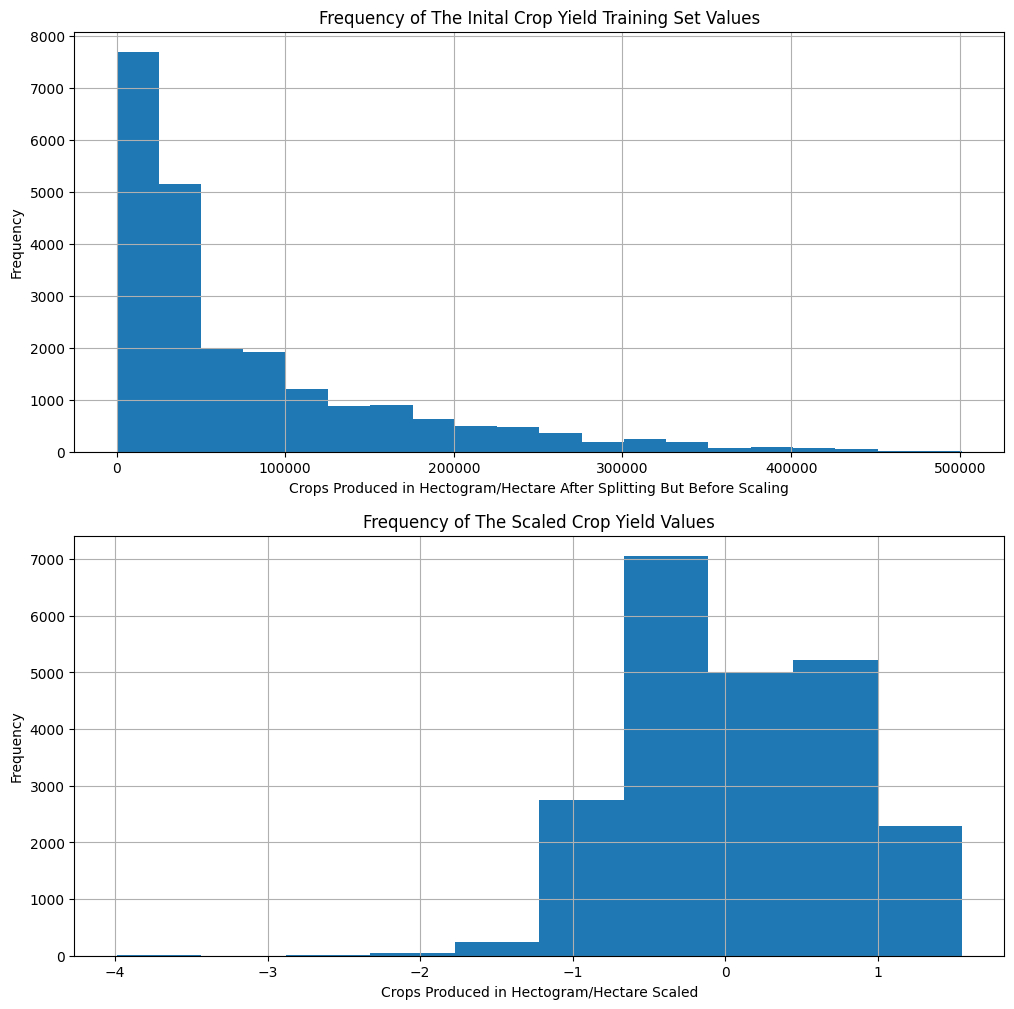

In [ ]:
plt.figure(1, figsize=(12,12))
plt.subplot(211)
crop_yield_train_2_labels.hist(bins=20)
plt.xlabel("Crops Produced in Hectogram/Hectare After Splitting But Before Scaling")
plt.ylabel("Frequency")
plt.title("Frequency of The Inital Crop Yield Training Set Values")

plt.subplot(212)
crop_yield_train_2_labels_scaled_1dim = crop_yield_train_2_labels_scaled.ravel()
crop_yield_train_2_labels_scaled_series = pd.Series(crop_yield_train_2_labels_scaled_1dim)
crop_yield_train_2_labels_scaled_series.hist(bins=10)
plt.xlabel("Crops Produced in Hectogram/Hectare Scaled")
plt.ylabel("Frequency")
plt.title("Frequency of The Scaled Crop Yield Values")
plt.plot()

print("The skew coefficient before scaling the crop yield values is", crop_yield_train_2_labels.skew())
print("The skew coefficient after scaling the crop yield values is", crop_yield_train_2_labels_scaled_series.skew())
print()

In [ ]:
import importlib.util
if(importlib.util.find_spec("pycountry_convert") is None):
  !pip install pycountry-convert
else:
  pass
import pycountry_convert as pc
print()

continents = []
continent_dict = {
    "AS" : "Asia",
    "NA" : "North America",
    "SA" : "South America",
    "AF" : "Africa",
    "EU" : "Europe",
    "OC" : "Oceania"
}
for i in crop_yield_train_2["Country"]:
  try:
    countries_alpha = pc.country_name_to_country_alpha2(i)
    country_continent_code = pc.country_alpha2_to_continent_code(countries_alpha)
    country_continent_name = continent_dict[country_continent_code]
    continents.append(country_continent_name)
  except Exception:
    print("There was an error")
    break
continents_series = pd.Series(continents).to_numpy()
crop_yield_train_2["Continent"] = continents_series
crop_yield_train_2 = crop_yield_train_2.reindex(columns = ["Country", "Continent", "Crop", "Year", "average_rainfall_in_mm_per_year", "pesticides_in_tons_used", "avg_temp", "rainfall_temperature", "pesticides_temperature", "rainfall_pesticides", "rainfall_temperature^2", "rainfall_temperature*rainfall_pesticides", "rainfall_pesticides^2"])
print(crop_yield_train_2["Continent"].info())
print()
print(crop_yield_train_2)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.5/253.5 kB 20.4 MB/s eta 0:00:00

<class 'pandas.core.series.Series'>
Index: 22593 entries, 19246 to 14376
Series name: Continent
Non-Null Count  Dtype 
--------------  ----- 
22593 non-null  object
dtypes: object(1)
memory usage: 353.0+ KB
None

            Country      Continent      Crop  Year  \
19246        Mexico  North America     Maize  1994   
7593        Ecuador  South America   Cassava  1995   
8077        Ecuador  South America     Wheat  2013   
6874       Colombia  South America   Sorghum  2010   
4147         Brazil  South America     Maize  2007   
...             ...            ...       ...   ...   
4526         Brazil  South America   Cassava  2011   
24162  Saudi Arabia           Asia   Sorghum  1991   
857       Australia        Oceania  Potatoes  1991   
1810        Austria         Europe     Maize  1999   
14376         India           Asia

In [ ]:
crop_yield_train_2_continent_cats = crop_yield_train_2[["Continent"]]
from sklearn.preprocessing import OneHotEncoder
continent_one_hot_encoder = OneHotEncoder()
crop_yield_train_2_continent_cat_one_hot_encoded = continent_one_hot_encoder.fit_transform(crop_yield_train_2_continent_cats)
print(crop_yield_train_2_continent_cat_one_hot_encoded)
print(continent_one_hot_encoder.categories_)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 22593 stored elements and shape (22593, 6)>
  Coords	Values
  (0, 3)	1.0
  (1, 5)	1.0
  (2, 5)	1.0
  (3, 5)	1.0
  (4, 5)	1.0
  (5, 5)	1.0
  (6, 1)	1.0
  (7, 0)	1.0
  (8, 5)	1.0
  (9, 2)	1.0
  (10, 4)	1.0
  (11, 3)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 2)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 3)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 5)	1.0
  (24, 1)	1.0
  :	:
  (22568, 2)	1.0
  (22569, 3)	1.0
  (22570, 1)	1.0
  (22571, 3)	1.0
  (22572, 0)	1.0
  (22573, 1)	1.0
  (22574, 5)	1.0
  (22575, 1)	1.0
  (22576, 2)	1.0
  (22577, 1)	1.0
  (22578, 3)	1.0
  (22579, 2)	1.0
  (22580, 2)	1.0
  (22581, 2)	1.0
  (22582, 0)	1.0
  (22583, 3)	1.0
  (22584, 3)	1.0
  (22585, 2)	1.0
  (22586, 1)	1.0
  (22587, 0)	1.0
  (22588, 5)	1.0
  (22589, 1)	1.0
  (22590, 4)	1.0
  (22591, 2)	1.0
  (22592, 1)	1.0
[array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)]


In [ ]:
corr_matrix = crop_yield_train_2.corr(numeric_only = True)
corr_matrix[(corr_matrix>=0.8) | (corr_matrix<=-0.8)]

,Year,average_rainfall_in_mm_per_year,pesticides_in_tons_used,avg_temp,rainfall_temperature,pesticides_temperature,rainfall_pesticides,rainfall_temperature^2,rainfall_temperature*rainfall_pesticides,rainfall_pesticides^2
Year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_rainfall_in_mm_per_year,NaN,1.000000,NaN,NaN,0.941311,NaN,NaN,0.882168,NaN,NaN
pesticides_in_tons_used,NaN,NaN,1.000000,NaN,NaN,0.973263,0.970536,NaN,0.880944,0.906743
avg_temp,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
rainfall_temperature,NaN,0.941311,NaN,NaN,1.000000,NaN,NaN,0.946733,NaN,NaN
pesticides_temperature,NaN,NaN,0.973263,NaN,NaN,1.000000,0.961526,NaN,0.913645,0.904618
rainfall_pesticides,NaN,NaN,0.970536,NaN,NaN,0.961526,1.000000,NaN,0.954636,0.941503
rainfall_temperature^2,NaN,0.882168,NaN,NaN,0.946733,NaN,NaN,1.000000,NaN,NaN
rainfall_temperature*rainfall_pesticides,NaN,NaN,0.880944,NaN,NaN,0.913645,0.954636,NaN,1.000000,0.894606
rainfall_pesticides^2,NaN,NaN,0.906743,NaN,NaN,0.904618,0.941503,NaN,0.894606,1.000000


In [ ]:
crop_yield_train_3 = crop_yield_train.copy()
crop_yield_train_3_labels = crop_yield_train_3["hg/ha_yield"].copy()
crop_yield_train_3.drop("hg/ha_yield", axis=1, errors="ignore", inplace=True)
crop_yield_train_3

,Country,Crop,Year,average_rainfall_in_mm_per_year,pesticides_in_tons_used,avg_temp
19246,Mexico,Maize,1994,758.0,34468.93,21.46
7593,Ecuador,Cassava,1995,2274.0,2658.00,21.96
8077,Ecuador,Wheat,2013,2274.0,6471.77,17.28
6874,Colombia,Sorghum,2010,3240.0,48618.46,22.68
4147,Brazil,Maize,2007,1761.0,304031.00,25.44
...,...,...,...,...,...,...
4526,Brazil,Cassava,2011,1761.0,345026.00,27.36
24162,Saudi Arabia,Sorghum,1991,59.0,994.00,25.43
857,Australia,Potatoes,1991,534.0,17866.00,20.29
1810,Austria,Maize,1999,1110.0,3418.60,9.17


In [ ]:
import importlib.util
if(importlib.util.find_spec("pycountry_convert") is None):
  !pip install pycountry-convert
else:
  pass
import pycountry_convert as pc
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

set_config(transform_output = "pandas")

numerical_attribs = ["Year", "average_rainfall_in_mm_per_year", "pesticides_in_tons_used", "avg_temp", "rainfall_temperature", "pesticides_temperature", "rainfall_pesticides", "rainfall_temperature^2", "rainfall_temperature*rainfall_pesticides", "rainfall_pesticides^2"]
numerical_attribs_without_poly_cols = ["Year", "average_rainfall_in_mm_per_year", "pesticides_in_tons_used", "avg_temp", "rainfall_temperature", "pesticides_temperature", "rainfall_pesticides"]
categorical_attribs = ["Country", "Continent", "Crop"]
log_transform_cols = ["pesticides_temperature", "rainfall_temperature", "rainfall_pesticides", "pesticides_in_tons_used", "rainfall_temperature^2", "rainfall_temperature*rainfall_pesticides", "rainfall_pesticides^2"]
log_transform_cols_without_poly_cols = ["pesticides_temperature", "rainfall_temperature", "rainfall_pesticides", "pesticides_in_tons_used"]

def output_engineered_features(df):
  df = df.copy()
  df["rainfall_temperature"] = df["average_rainfall_in_mm_per_year"] * df["avg_temp"]
  df["pesticides_temperature"] = df["pesticides_in_tons_used"] * df["avg_temp"]
  df["rainfall_pesticides"] = df["average_rainfall_in_mm_per_year"] * df["pesticides_in_tons_used"]
  return df
feature_engineering_transformer = FunctionTransformer(output_engineered_features)

def clip_year(df):
  df = df.copy()
  df["Year"].clip(lower = 1990, upper = 2013, inplace = True)
  return df
clip_year_transformer = FunctionTransformer(clip_year)

def add_continent_column(df):
  df = df.copy()
  continents = []
  continent_dict = {
    "AS" : "Asia",
    "NA" : "North America",
    "SA" : "South America",
    "AF" : "Africa",
    "EU" : "Europe",
    "OC" : "Oceania"
}
  for i in df["Country"]:
    try:
      countries_alpha = pc.country_name_to_country_alpha2(i)
      country_continent_code = pc.country_alpha2_to_continent_code(countries_alpha)
      country_continent_name = continent_dict[country_continent_code]
      continents.append(country_continent_name)
    except Exception:
      print("There was an error")
      break
  continents_series = pd.Series(continents).to_numpy()
  df["Continent"] = continents_series
  return df
continent_column_transformer = FunctionTransformer(add_continent_column)

def log_transform(df):
  df = df.copy()
  for i in log_transform_cols:
    df[i] = np.log1p(df[i])
  return df
log_columns_transformer = FunctionTransformer(log_transform)

def log_transform_without_poly_features(df):
  df = df.copy()
  for i in log_transform_cols_without_poly_cols:
    df[i] = np.log1p(df[i])
  return df
log_columns_without_poly_features_transformer = FunctionTransformer(log_transform_without_poly_features)

def polynomial_features(df):
  df = df.copy()
  poly_features = PolynomialFeatures(degree=2, include_bias=False)
  base_cols = ["rainfall_temperature", "rainfall_pesticides"]

  poly_array = poly_features.fit_transform(df[base_cols])
  poly_cols = poly_features.get_feature_names_out(base_cols)

  wanted_cols = poly_cols[2:]
  df[wanted_cols] = poly_array.iloc[:, 2:]

  df.rename(columns={
      "rainfall_temperature rainfall_pesticides": "rainfall_temperature*rainfall_pesticides"
  }, inplace=True)
  return df
polynomial_features_transformer = FunctionTransformer(polynomial_features, validate = False)

preprocessing = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse_output = False, handle_unknown = "ignore"), categorical_attribs),
    ("scaling", RobustScaler(), numerical_attribs)
], remainder = "passthrough")

preprocessing_without_poly_features = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse_output = False, handle_unknown = "ignore"), categorical_attribs),
    ("scaling", RobustScaler(), numerical_attribs_without_poly_cols)
], remainder = "passthrough")

crop_yield_features_pipeline = Pipeline([
    ("clip_year", clip_year_transformer),
    ("engineered_features", feature_engineering_transformer),
    ("poly_features", polynomial_features_transformer),
    ("log_transform_features", log_columns_transformer),
    ("continent_column", continent_column_transformer),
    ("base_preprocessors", preprocessing)
])

crop_yield_features_without_poly_expansion_pipeline = Pipeline([
    ("clip_year", clip_year_transformer),
    ("engineered_features", feature_engineering_transformer),
    ("log_transform_features", log_columns_without_poly_features_transformer),
    ("continent_column", continent_column_transformer),
    ("base_preprocessors", preprocessing_without_poly_features)
])

crop_yield_target_pipeline = Pipeline([
    ("log_transform_target", FunctionTransformer(func = np.log1p, inverse_func = np.expm1, validate = True)),
    ("target_scaling", RobustScaler())
])

lasso_regression_pipeline = TransformedTargetRegressor(
    regressor = Pipeline([
        ("feature_pipeline", crop_yield_features_without_poly_expansion_pipeline),
        ("algorithm", Lasso(random_state = 42))
    ]),
    transformer = crop_yield_target_pipeline
)

polynomial_regression_pipeline = TransformedTargetRegressor(
    regressor = Pipeline([
        ("feature_pipeline", crop_yield_features_pipeline),
        ("algorithm", Ridge(random_state = 42))
    ]),
    transformer = crop_yield_target_pipeline
)

random_forest_regression_pipeline = TransformedTargetRegressor(
    regressor = Pipeline([
        ("feature_pipeline", crop_yield_features_without_poly_expansion_pipeline),
        ("algorithm", RandomForestRegressor(random_state = 42, n_jobs = -1))
    ]),
    transformer = crop_yield_target_pipeline
)

k_nearest_neighbors_pipeline = TransformedTargetRegressor(
    regressor = Pipeline([
        ("feature_pipeline", crop_yield_features_without_poly_expansion_pipeline),
        ("algorithm", KNeighborsRegressor(n_jobs = -1))
    ]),
    transformer = crop_yield_target_pipeline
)

gradient_boosting_pipeline = TransformedTargetRegressor(
    regressor = Pipeline([
        ("feature_pipeline", crop_yield_features_without_poly_expansion_pipeline),
        ("algorithm", GradientBoostingRegressor(random_state = 42))
    ]),
    transformer = crop_yield_target_pipeline
)

support_vector_regression_pipeline = TransformedTargetRegressor(
    regressor = Pipeline([
        ("feature_pipeline", crop_yield_features_without_poly_expansion_pipeline),
        ("algorithm", SVR())
    ]),
    transformer = crop_yield_target_pipeline
)

In [ ]:
from sklearn.model_selection import cross_validate, RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform

lasso_regression_param_grid = {
    "regressor__algorithm__alpha": loguniform(0.05, 10),
    "regressor__algorithm__fit_intercept": [True, False],
    "regressor__algorithm__max_iter": randint(low = 100, high = 50000),
    "regressor__algorithm__tol": uniform(loc = 0.000001, scale = 0.1-0.000001)
}

lasso_regression_rnd_search = RandomizedSearchCV(lasso_regression_pipeline, param_distributions = lasso_regression_param_grid, n_iter = 25, cv = 10, scoring = "neg_root_mean_squared_error", random_state = 42, n_jobs = -1)
lasso_regression_negative_nested_scores = cross_validate(lasso_regression_rnd_search, crop_yield_train_3, crop_yield_train_3_labels, scoring = ["neg_root_mean_squared_error", "r2", "neg_mean_squared_error", "neg_mean_absolute_error"], cv=10)

lasso_regression_rmse = -lasso_regression_negative_nested_scores["test_neg_root_mean_squared_error"]
lasso_regression_mse = -lasso_regression_negative_nested_scores["test_neg_mean_squared_error"]
lasso_regression_r2 = lasso_regression_negative_nested_scores["test_r2"]
lasso_regression_mae = -lasso_regression_negative_nested_scores["test_neg_mean_absolute_error"]

print(f"Mean Root-Mean-Squared-Error: {lasso_regression_rmse.mean()}")
print(f"Mean Mean-Squared-Error: {lasso_regression_mse.mean()}")
print(f"Mean R-Squared: {lasso_regression_r2.mean()}")
print(f"Mean Mean-Absolute-Error: {lasso_regression_mae.mean()}")

In [ ]:
import joblib
from google.colab import files

drive.mount("/content/drive")
# lasso_regression_rnd_search.fit(crop_yield_train_3, crop_yield_train_3_labels)
# final_lasso_regression_model = lasso_regression_rnd_search.best_estimator_
# joblib.dump(final_lasso_regression_model, "lasso_regression_best_model.joblib")
# files.download("lasso_regression_best_model.joblib")
loaded_final_lasso_regression_model = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/lasso_regression_best_model.joblib")

# joblib.dump({
#     "best_params": lasso_regression_rnd_search.best_params_,
#     "best_score": lasso_regression_rnd_search.best_score_
# },
# "final_lasso_regression_model_best_parameters_and_score.joblib")
# files.download("final_lasso_regression_model_best_parameters_and_score.joblib")
loaded_lasso_regression_best_params_and_best_score = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/final_lasso_regression_model_best_parameters_and_score.joblib")

# joblib.dump({
#     "mean_rmse": lasso_regression_rmse.mean(),
#     "mean_mse": lasso_regression_mse.mean(),
#     "mean_r2": lasso_regression_r2.mean(),
#     "mean_mae": lasso_regression_mae.mean()
# },
# "final_lasso_regression_model_metrics.joblib"
# )
# files.download("final_lasso_regression_model_metrics.joblib")
loaded_lasso_regression_metrics = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/final_lasso_regression_model_metrics.joblib")

print()
print("Lasso Regression Metrics(Outer CV):")
print(f"Mean RMSE: {loaded_lasso_regression_metrics["mean_rmse"]}")
print(f"Mean MSE: {loaded_lasso_regression_metrics["mean_mse"]}")
print(f"Mean R^2: {loaded_lasso_regression_metrics["mean_r2"]}")
print(f"Mean MAE: {loaded_lasso_regression_metrics["mean_mae"]}")

print()
print("Lasso Regression Best Score and Hyperparameters(Inner CV):")
print(f"Best Hyperparameters: {loaded_lasso_regression_best_params_and_best_score["best_params"]}")
print(f"Best Score: {-loaded_lasso_regression_best_params_and_best_score["best_score"]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Lasso Regression Metrics(Outer CV):
Mean RMSE: 77382.96023544423
Mean MSE: 5993909584.411533
Mean R^2: 0.16595084170746086
Mean MAE: 47079.16503878364

Lasso Regression Best Score and Hyperparameters(Inner CV):
Best Hyperparameters: {'regressor__algorithm__alpha': np.float64(0.05387262018981444), 'regressor__algorithm__fit_intercept': True, 'regressor__algorithm__max_iter': 39604, 'regressor__algorithm__tol': np.float64(0.07113448393291226)}
Best Score: 77382.96023544423


In [ ]:
# from sklearn.model_selection import cross_validate, RandomizedSearchCV
# from scipy.stats import randint, uniform, loguniform

# polynomial_regression_param_grid = {
#     "regressor__algorithm__alpha": loguniform(0.05, 10),
#     "regressor__algorithm__fit_intercept": [True, False],
#     "regressor__algorithm__max_iter": randint(low = 100, high = 50000),
#     "regressor__algorithm__tol": uniform(loc = 0.000001, scale = 0.1-0.000001),
#     "regressor__algorithm__solver": ["auto", "svd", "sag", "saga"]
# }

# polynomial_regression_rnd_search = RandomizedSearchCV(polynomial_regression_pipeline, param_distributions = polynomial_regression_param_grid, n_iter = 25, cv = 10, scoring = "neg_root_mean_squared_error", random_state = 42, n_jobs = -1)
# polynomial_regression_negative_nested_scores = cross_validate(polynomial_regression_rnd_search, crop_yield_train_3.copy(), crop_yield_train_3_labels, scoring = ["neg_root_mean_squared_error", "r2", "neg_mean_squared_error", "neg_mean_absolute_error"], cv=10)

# polynomial_regression_rmse = -polynomial_regression_negative_nested_scores["test_neg_root_mean_squared_error"]
# polynomial_regression_mse = -polynomial_regression_negative_nested_scores["test_neg_mean_squared_error"]
# polynomial_regression_r2 = polynomial_regression_negative_nested_scores["test_r2"]
# polynomial_regression_mae = -polynomial_regression_negative_nested_scores["test_neg_mean_absolute_error"]

# print(f"Mean Root-Mean-Squared-Error: {polynomial_regression_rmse.mean()}")
# print(f"Mean Mean-Squared-Error: {polynomial_regression_mse.mean()}")
# print(f"Mean R-Squared: {polynomial_regression_r2.mean()}")
# print(f"Mean Mean-Absolute-Error: {polynomial_regression_mae.mean()}")

In [ ]:
import joblib
from google.colab import files

drive.mount("/content/drive")
# polynomial_regression_rnd_search.fit(crop_yield_train_3.copy(), crop_yield_train_3_labels)
# final_polynomial_regression_model = polynomial_regression_rnd_search.best_estimator_
# joblib.dump(final_polynomial_regression_model, "polynomial_regression_best_model.joblib")
# files.download("polynomial_regression_best_model.joblib")
loaded_final_polynomial_regression_model = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/polynomial_regression_best_model.joblib")

# joblib.dump({
#     "best_params": polynomial_regression_rnd_search.best_params_,
#     "best_score": polynomial_regression_rnd_search.best_score_
# },
# "final_polynomial_regression_model_best_parameters_and_score.joblib")
# files.download("final_polynomial_regression_model_best_parameters_and_score.joblib")
loaded_polynomial_regression_best_params_and_best_score = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/final_polynomial_regression_model_best_parameters_and_score.joblib")

# joblib.dump({
#     "mean_rmse": polynomial_regression_rmse.mean(),
#     "mean_mse": polynomial_regression_mse.mean(),
#     "mean_r2": polynomial_regression_r2.mean(),
#     "mean_mae": polynomial_regression_mae.mean()
# },
# "final_polynomial_regression_model_metrics.joblib"
# )
# files.download("final_polynomial_regression_model_metrics.joblib")
loaded_polynomial_regression_metrics = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/final_polynomial_regression_model_metrics.joblib")

print()
print("Polynomial Regression Metrics(Outer CV):")
print(f"Mean RMSE: {loaded_polynomial_regression_metrics["mean_rmse"]}")
print(f"Mean MSE: {loaded_polynomial_regression_metrics["mean_mse"]}")
print(f"Mean R^2: {loaded_polynomial_regression_metrics["mean_r2"]}")
print(f"Mean MAE: {loaded_polynomial_regression_metrics["mean_mae"]}")

print()
print("Polynomial Regression Best Score and Hyperparameters(Inner CV):")
print(f"Best Hyperparameters: {loaded_polynomial_regression_best_params_and_best_score["best_params"]}")
print(f"Best Score: {-loaded_polynomial_regression_best_params_and_best_score["best_score"]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Polynomial Regression Metrics(Outer CV):
Mean RMSE: 39706.76643625779
Mean MSE: 1579844876.5798643
Mean R^2: 0.7802000935455312
Mean MAE: 22247.488164298546

Polynomial Regression Best Score and Hyperparameters(Inner CV):
Best Hyperparameters: {'regressor__algorithm__alpha': np.float64(4.388011150458059), 'regressor__algorithm__fit_intercept': True, 'regressor__algorithm__max_iter': 8629, 'regressor__algorithm__solver': 'sag', 'regressor__algorithm__tol': np.float64(0.08287392217768379)}
Best Score: 39168.51664753482


In [ ]:
# from sklearn.model_selection import cross_validate, RandomizedSearchCV
# from scipy.stats import randint

# random_forest_regression_param_grid = {
#     "regressor__algorithm__n_estimators": randint(10, 300),
#     "regressor__algorithm__max_depth": [None, 20, 40],
#     "regressor__algorithm__min_samples_split": randint(2, 15),
#     "regressor__algorithm__min_samples_leaf": randint(1, 10),
#     "regressor__algorithm__max_features": ["sqrt", "log2", 0.5, 1],
# }

# random_forest_regression_rnd_search = RandomizedSearchCV(random_forest_regression_pipeline, param_distributions = random_forest_regression_param_grid, n_iter = 25, cv = 10, scoring = "neg_root_mean_squared_error", random_state = 42, n_jobs = -1)
# random_forest_regression_negative_nested_scores = cross_validate(random_forest_regression_rnd_search, crop_yield_train_3.copy(), crop_yield_train_3_labels, scoring = ["neg_root_mean_squared_error", "r2", "neg_mean_squared_error", "neg_mean_absolute_error"], cv=10)

# random_forest_regression_rmse = -random_forest_regression_negative_nested_scores["test_neg_root_mean_squared_error"]
# random_forest_regression_mse = -random_forest_regression_negative_nested_scores["test_neg_mean_squared_error"]
# random_forest_regression_r2 = random_forest_regression_negative_nested_scores["test_r2"]
# random_forest_regression_mae = -random_forest_regression_negative_nested_scores["test_neg_mean_absolute_error"]

# print(f"Mean Root-Mean-Squared-Error: {random_forest_regression_rmse.mean()}")
# print(f"Mean Mean-Squared-Error: {random_forest_regression_mse.mean()}")
# print(f"Mean R-Squared: {random_forest_regression_r2.mean()}")
# print(f"Mean Mean-Absolute-Error: {random_forest_regression_mae.mean()}")

In [ ]:
import joblib
from google.colab import files

drive.mount("/content/drive")
# random_forest_regression_rnd_search.fit(crop_yield_train_3.copy(), crop_yield_train_3_labels)
# final_random_forest_regression_model = random_forest_regression_rnd_search.best_estimator_
# joblib.dump(final_random_forest_regression_model, "random_forest_regression_best_model.joblib")
# files.download("random_forest_regression_best_model.joblib")
loaded_final_random_forest_regression_model = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/random_forest_regression_best_model.joblib")

# joblib.dump({
#     "best_params": random_forest_regression_rnd_search.best_params_,
#     "best_score": random_forest_regression_rnd_search.best_score_
# },
# "final_random_forest_regression_model_best_parameters_and_score.joblib")
# files.download("final_random_forest_regression_model_best_parameters_and_score.joblib")
loaded_random_forest_regression_best_params_and_best_score = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/final_random_forest_regression_model_best_parameters_and_score.joblib")

# joblib.dump({
#     "mean_rmse": random_forest_regression_rmse.mean(),
#     "mean_mse": random_forest_regression_mse.mean(),
#     "mean_r2": random_forest_regression_r2.mean(),
#     "mean_mae": random_forest_regression_mae.mean()
# },
# "final_random_forest_regression_model_metrics.joblib"
# )
# files.download("final_random_forest_regression_model_metrics.joblib")
loaded_random_forest_regression_metrics = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/final_random_forest_regression_model_metrics.joblib")

print()
print("Random Forest Regression Metrics(Outer CV):")
print(f"Mean RMSE: {loaded_random_forest_regression_metrics["mean_rmse"]}")
print(f"Mean MSE: {loaded_random_forest_regression_metrics["mean_mse"]}")
print(f"Mean R^2: {loaded_random_forest_regression_metrics["mean_r2"]}")
print(f"Mean MAE: {loaded_random_forest_regression_metrics["mean_mae"]}")

print()
print("Random Forest Best Score and Hyperparameters(Inner CV):")
print(f"Best Hyperparameters: {loaded_random_forest_regression_best_params_and_best_score["best_params"]}")
print(f"Best Score: {-loaded_random_forest_regression_best_params_and_best_score["best_score"]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Random Forest Regression Metrics(Outer CV):
Mean RMSE: 11018.346883046754
Mean MSE: 121849418.83701964
Mean R^2: 0.9830597782756838
Mean MAE: 4481.864988645719

Random Forest Best Score and Hyperparameters(Inner CV):
Best Hyperparameters: {'regressor__algorithm__max_depth': 40, 'regressor__algorithm__max_features': 0.5, 'regressor__algorithm__min_samples_leaf': 1, 'regressor__algorithm__min_samples_split': 5, 'regressor__algorithm__n_estimators': 59}
Best Score: 10605.352951686213


In [ ]:
# from sklearn.model_selection import cross_validate, RandomizedSearchCV
# from scipy.stats import randint

# knn_param_grid = {
#     "regressor__algorithm__n_neighbors": randint(3, 50),
#     "regressor__algorithm__metric": ["euclidean", "manhattan", "minkowski"],
#     "regressor__algorithm__algorithm": ["auto", "ball_tree", "kd_tree"],
#     "regressor__algorithm__weights": ["uniform", "distance"],
#     "regressor__algorithm__p": [1, 2, 3]
# }

# knn_rnd_search = RandomizedSearchCV(k_nearest_neighbors_pipeline, param_distributions = knn_param_grid, n_iter = 25, cv = 10, scoring = "neg_root_mean_squared_error", random_state = 42, n_jobs = -1)
# knn_negative_nested_scores = cross_validate(knn_rnd_search, crop_yield_train_3.copy(), crop_yield_train_3_labels, scoring = ["neg_root_mean_squared_error", "r2", "neg_mean_squared_error", "neg_mean_absolute_error"], cv=10)

# knn_rmse = -knn_negative_nested_scores["test_neg_root_mean_squared_error"]
# knn_mse = -knn_negative_nested_scores["test_neg_mean_squared_error"]
# knn_r2 = knn_negative_nested_scores["test_r2"]
# knn_mae = -knn_negative_nested_scores["test_neg_mean_absolute_error"]

# print(f"Mean Root-Mean-Squared-Error: {knn_rmse.mean()}")
# print(f"Mean Mean-Squared-Error: {knn_mse.mean()}")
# print(f"Mean R-Squared: {knn_r2.mean()}")
# print(f"Mean Mean-Absolute-Error: {knn_mae.mean()}")

In [ ]:
import joblib
from google.colab import files

drive.mount("/content/drive")
# knn_rnd_search.fit(crop_yield_train_3.copy(), crop_yield_train_3_labels)
# final_k_nearest_neighbors_model = knn_rnd_search.best_estimator_
# joblib.dump(final_k_nearest_neighbors_model, "k_nearest_neighbors_best_model.joblib")
# files.download("k_nearest_neighbors_best_model.joblib")
loaded_final_k_nearest_neighbors_model = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/k_nearest_neighbors_best_model.joblib")

# joblib.dump({
#     "best_params": knn_rnd_search.best_params_,
#     "best_score": knn_rnd_search.best_score_
# },
# "final_k_nearest_neighbors_model_best_parameters_and_score.joblib")
# files.download("final_k_nearest_neighbors_model_best_parameters_and_score.joblib")
loaded_k_nearest_neighbors_best_params_and_best_score = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/final_k_nearest_neighbors_model_best_parameters_and_score.joblib")

# joblib.dump({
#     "mean_rmse": knn_rmse.mean(),
#     "mean_mse": knn_mse.mean(),
#     "mean_r2": knn_r2.mean(),
#     "mean_mae": knn_mae.mean()
# },
# "final_k_nearest_neighbors_model_metrics.joblib"
# )
# files.download("final_k_nearest_neighbors_model_metrics.joblib")
loaded_k_nearest_neighbors_metrics = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/final_k_nearest_neighbors_model_metrics.joblib")

print()
print("K-Nearest Neighbors Metrics(Outer CV):")
print(f"Mean RMSE: {loaded_k_nearest_neighbors_metrics["mean_rmse"]}")
print(f"Mean MSE: {loaded_k_nearest_neighbors_metrics["mean_mse"]}")
print(f"Mean R^2: {loaded_k_nearest_neighbors_metrics["mean_r2"]}")
print(f"Mean MAE: {loaded_k_nearest_neighbors_metrics["mean_mae"]}")

print()
print("K-Nearest Neighbors Best Score and Hyperparameters(Inner CV):")
print(f"Best Hyperparameters: {loaded_k_nearest_neighbors_best_params_and_best_score["best_params"]}")
print(f"Best Score: {-loaded_k_nearest_neighbors_best_params_and_best_score["best_score"]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

K-Nearest Neighbors Metrics(Outer CV):
Mean RMSE: 9857.261406975611
Mean MSE: 98297390.41793367
Mean R^2: 0.9863855578022822
Mean MAE: 3842.460566574784

K-Nearest Neighbors Best Score and Hyperparameters(Inner CV):
Best Hyperparameters: {'regressor__algorithm__algorithm': 'kd_tree', 'regressor__algorithm__metric': 'manhattan', 'regressor__algorithm__n_neighbors': 4, 'regressor__algorithm__p': 2, 'regressor__algorithm__weights': 'distance'}
Best Score: 9829.358756928445


In [ ]:
# from sklearn.model_selection import cross_validate, RandomizedSearchCV
# from scipy.stats import randint, loguniform

# gradient_boosting_param_grid = {
#     "regressor__algorithm__n_estimators": randint(10, 300),
#     "regressor__algorithm__learning_rate": loguniform(0.01, 0.2),
#     "regressor__algorithm__max_depth": randint(2, 6),
#     "regressor__algorithm__min_samples_split": randint(2, 15),
#     "regressor__algorithm__min_samples_leaf": randint(1, 10),
#     "regressor__algorithm__subsample": [0.5, 0.75, 1.0]
# }

# gradient_boosting_rnd_search = RandomizedSearchCV(gradient_boosting_pipeline, param_distributions = gradient_boosting_param_grid, n_iter = 25, cv = 10, scoring = "neg_root_mean_squared_error", random_state = 42, n_jobs = -1)
# gradient_boosting_negative_nested_scores = cross_validate(gradient_boosting_rnd_search, crop_yield_train_3.copy(), crop_yield_train_3_labels, scoring = ["neg_root_mean_squared_error", "r2", "neg_mean_squared_error", "neg_mean_absolute_error"], cv=10)

# gradient_boosting_rmse = -gradient_boosting_negative_nested_scores["test_neg_root_mean_squared_error"]
# gradient_boosting_mse = -gradient_boosting_negative_nested_scores["test_neg_mean_squared_error"]
# gradient_boosting_r2 = gradient_boosting_negative_nested_scores["test_r2"]
# gradient_boosting_mae = -gradient_boosting_negative_nested_scores["test_neg_mean_absolute_error"]

# print(f"Mean Root-Mean-Squared-Error: {gradient_boosting_rmse.mean()}")
# print(f"Mean Mean-Squared-Error: {gradient_boosting_mse.mean()}")
# print(f"Mean R-Squared: {gradient_boosting_r2.mean()}")
# print(f"Mean Mean-Absolute-Error: {gradient_boosting_mae.mean()}")

In [ ]:
import joblib
from google.colab import files

drive.mount("/content/drive")
# gradient_boosting_rnd_search.fit(crop_yield_train_3.copy(), crop_yield_train_3_labels)
# final_gradient_boosting_model = gradient_boosting_rnd_search.best_estimator_
# joblib.dump(final_gradient_boosting_model, "gradient_boosting_best_model.joblib")
# files.download("gradient_boosting_best_model.joblib")
loaded_final_gradient_boosting_model = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/gradient_boosting_best_model.joblib")

# joblib.dump({
#     "best_params": gradient_boosting_rnd_search.best_params_,
#     "best_score": gradient_boosting_rnd_search.best_score_
# },
# "final_gradient_boosting_model_best_parameters_and_score.joblib")
# files.download("final_gradient_boosting_model_best_parameters_and_score.joblib")
loaded_gradient_boosting_best_params_and_best_score = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/final_gradient_boosting_model_best_parameters_and_score.joblib")

# joblib.dump({
#     "mean_rmse": gradient_boosting_rmse.mean(),
#     "mean_mse": gradient_boosting_mse.mean(),
#     "mean_r2": gradient_boosting_r2.mean(),
#     "mean_mae": gradient_boosting_mae.mean()
# },
# "final_gradient_boosting_model_metrics.joblib"
# )
# files.download("final_gradient_boosting_model_metrics.joblib")
loaded_gradient_boosting_metrics = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/final_gradient_boosting_model_metrics.joblib")

print()
print("Gradient Boosting Metrics(Outer CV):")
print(f"Mean RMSE: {loaded_gradient_boosting_metrics["mean_rmse"]}")
print(f"Mean MSE: {loaded_gradient_boosting_metrics["mean_mse"]}")
print(f"Mean R^2: {loaded_gradient_boosting_metrics["mean_r2"]}")
print(f"Mean MAE: {loaded_gradient_boosting_metrics["mean_mae"]}")

print()
print("Gradient Boosting Best Score and Hyperparameters(Inner CV):")
print(f"Best Hyperparameters: {loaded_gradient_boosting_best_params_and_best_score["best_params"]}")
print(f"Best Score: {-loaded_gradient_boosting_best_params_and_best_score["best_score"]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Gradient Boosting Metrics(Outer CV):
Mean RMSE: 15716.786635823151
Mean MSE: 247430431.66811785
Mean R^2: 0.9655971245256932
Mean MAE: 8437.517882080338

Gradient Boosting Best Score and Hyperparameters(Inner CV):
Best Hyperparameters: {'regressor__algorithm__learning_rate': np.float64(0.17160445029754812), 'regressor__algorithm__max_depth': 5, 'regressor__algorithm__min_samples_leaf': 2, 'regressor__algorithm__min_samples_split': 11, 'regressor__algorithm__n_estimators': 274, 'regressor__algorithm__subsample': 0.75}
Best Score: 15750.08973151049


In [ ]:
# from sklearn.model_selection import cross_validate, RandomizedSearchCV
# from scipy.stats import randint, loguniform

# svr_param_grid = {
#     "regressor__algorithm__C": loguniform(0.01, 1000),
#     "regressor__algorithm__kernel": ["linear", "rbf"],
#     "regressor__algorithm__gamma": loguniform(0.0001, 10),
#     "regressor__algorithm__epsilon": loguniform(0.01, 10),
# }

# svr_rnd_search = RandomizedSearchCV(support_vector_regression_pipeline, param_distributions = svr_param_grid, n_iter = 25, cv = 10, scoring = "neg_root_mean_squared_error", random_state = 42, n_jobs = -1)
# svr_negative_nested_scores = cross_validate(svr_rnd_search, crop_yield_train_3.copy(), crop_yield_train_3_labels, scoring = ["neg_root_mean_squared_error", "r2", "neg_mean_squared_error", "neg_mean_absolute_error"], cv=10)

# svr_rmse = -svr_negative_nested_scores["test_neg_root_mean_squared_error"]
# svr_mse = -svr_negative_nested_scores["test_neg_mean_squared_error"]
# svr_r2 = svr_negative_nested_scores["test_r2"]
# svr_mae = -svr_negative_nested_scores["test_neg_mean_absolute_error"]

# print(f"Mean Root-Mean-Squared-Error: {svr_rmse.mean()}")
# print(f"Mean Mean-Squared-Error: {svr_mse.mean()}")
# print(f"Mean R-Squared: {svr_r2.mean()}")
# print(f"Mean Mean-Absolute-Error: {svr_mae.mean()}")

In [ ]:
import joblib
from google.colab import files

drive.mount("/content/drive")
# svr_rnd_search.fit(crop_yield_train_3.copy(), crop_yield_train_3_labels)
# final_support_vector_regression_model = svr_rnd_search.best_estimator_
# joblib.dump(final_support_vector_regression_model, "support_vector_regression_best_model.joblib")
# files.download("support_vector_regression_best_model.joblib")
loaded_final_support_vector_regression_model = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/support_vector_regression_best_model.joblib")

# joblib.dump({
#     "best_params": svr_rnd_search.best_params_,
#     "best_score": svr_rnd_search.best_score_
# },
# "final_support_vector_regression_model_best_parameters_and_score.joblib")
# files.download("final_support_vector_regression_model_best_parameters_and_score.joblib")
loaded_support_vector_regression_best_params_and_best_score = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/final_support_vector_regression_model_best_parameters_and_score.joblib")

# joblib.dump({
#     "mean_rmse": svr_rmse.mean(),
#     "mean_mse": svr_mse.mean(),
#     "mean_r2": svr_r2.mean(),
#     "mean_mae": svr_mae.mean()
# },
# "final_support_vector_regression_model_metrics.joblib"
# )
# files.download("final_support_vector_regression_model_metrics.joblib")
loaded_support_vector_regression_metrics = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/final_support_vector_regression_model_metrics.joblib")

print()
print("Support Vector Regression Metrics(Outer CV):")
print(f"Mean RMSE: {loaded_support_vector_regression_metrics["mean_rmse"]}")
print(f"Mean MSE: {loaded_support_vector_regression_metrics["mean_mse"]}")
print(f"Mean R^2: {loaded_support_vector_regression_metrics["mean_r2"]}")
print(f"Mean MAE: {loaded_support_vector_regression_metrics["mean_mae"]}")

print()
print("Support Vector Regression Best Score and Hyperparameters(Inner CV):")
print(f"Best Hyperparameters: {loaded_support_vector_regression_best_params_and_best_score["best_params"]}")
print(f"Best Score: {-loaded_support_vector_regression_best_params_and_best_score["best_score"]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Support Vector Regression Metrics(Outer CV):
Mean RMSE: 15678.580633585454
Mean MSE: 249106258.00942636
Mean R^2: 0.9655290935909392
Mean MAE: 6304.13218856439

Support Vector Regression Best Score and Hyperparameters(Inner CV):
Best Hyperparameters: {'regressor__algorithm__C': np.float64(1.7885301261862006), 'regressor__algorithm__epsilon': np.float64(0.010959604536925849), 'regressor__algorithm__gamma': np.float64(5.140540420871591), 'regressor__algorithm__kernel': 'rbf'}
Best Score: 14769.161467774658


In [ ]:
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
model_metrics_dict = {
    "Lasso Regression": pd.Series([loaded_lasso_regression_metrics["mean_rmse"], loaded_lasso_regression_metrics["mean_mse"], loaded_lasso_regression_metrics["mean_r2"], loaded_lasso_regression_metrics["mean_mae"]], index = ["RMSE", "MSE", "R^2", "MAE"]),
    "Polynomial Regression": pd.Series([loaded_polynomial_regression_metrics["mean_rmse"], loaded_polynomial_regression_metrics["mean_mse"], loaded_polynomial_regression_metrics["mean_r2"], loaded_polynomial_regression_metrics["mean_mae"]], index = ["RMSE", "MSE", "R^2", "MAE"]),
    "Random Forest Regression": pd.Series([loaded_random_forest_regression_metrics["mean_rmse"], loaded_random_forest_regression_metrics["mean_mse"], loaded_random_forest_regression_metrics["mean_r2"], loaded_random_forest_regression_metrics["mean_mae"]], index = ["RMSE", "MSE", "R^2", "MAE"]),
    "KNN": pd.Series([loaded_k_nearest_neighbors_metrics["mean_rmse"], loaded_k_nearest_neighbors_metrics["mean_mse"], loaded_k_nearest_neighbors_metrics["mean_r2"], loaded_k_nearest_neighbors_metrics["mean_mae"]], index = ["RMSE", "MSE", "R^2", "MAE"]),
    "Gradient Boosting": pd.Series([loaded_gradient_boosting_metrics["mean_rmse"], loaded_gradient_boosting_metrics["mean_mse"], loaded_gradient_boosting_metrics["mean_r2"], loaded_gradient_boosting_metrics["mean_mae"]], index = ["RMSE", "MSE", "R^2", "MAE"]),
    "SVR": pd.Series([loaded_support_vector_regression_metrics["mean_rmse"], loaded_support_vector_regression_metrics["mean_mse"], loaded_support_vector_regression_metrics["mean_r2"], loaded_support_vector_regression_metrics["mean_mae"]], index = ["RMSE", "MSE", "R^2", "MAE"])
}
model_metrics_df = pd.DataFrame(model_metrics_dict)
# model_metrics_df.to_csv("cross_validation_model_metrics.csv")
# files.download("cross_validation_model_metrics.csv")
model_metrics_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Lasso Regression,Polynomial Regression,Random Forest Regression,KNN,Gradient Boosting,SVR
RMSE,"77,382.96","39,706.77","11,018.35","9,857.26","15,716.79","15,678.58"
MSE,"5,993,909,584.41","1,579,844,876.58","121,849,418.84","98,297,390.42","247,430,431.67","249,106,258.01"
R^2,0.17,0.78,0.98,0.99,0.97,0.97
MAE,"47,079.17","22,247.49","4,481.86","3,842.46","8,437.52","6,304.13"


In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error, mean_absolute_error
import joblib

crop_yield_test_3 = crop_yield_test.copy()
crop_yield_test_3.drop("hg/ha_yield", axis = 1, errors = "ignore", inplace = True)
crop_yield_test_3_labels = crop_yield_test["hg/ha_yield"].copy()

lasso_regression_test_set_predictions = loaded_final_lasso_regression_model.predict(crop_yield_test_3)
lasso_regression_test_set_rmse = root_mean_squared_error(crop_yield_test_3_labels, lasso_regression_test_set_predictions)
lasso_regression_test_set_mse = mean_squared_error(crop_yield_test_3_labels, lasso_regression_test_set_predictions)
lasso_regression_test_set_r2 = r2_score(crop_yield_test_3_labels, lasso_regression_test_set_predictions)
lasso_regression_test_set_mae = mean_absolute_error(crop_yield_test_3_labels, lasso_regression_test_set_predictions)

drive.mount("/content/drive")
# joblib.dump({
#     "Predictions": lasso_regression_test_set_predictions,
#     "RMSE": lasso_regression_test_set_rmse,
#     "MSE": lasso_regression_test_set_mse,
#     "R^2": lasso_regression_test_set_r2,
#     "MAE": lasso_regression_test_set_mae
# },
# "lasso_regression_test_set_metrics_and_predictions.joblib"
# )
# files.download("lasso_regression_test_set_metrics_and_predictions.joblib")
loaded_lasso_regression_test_set_metrics_and_predictions = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/lasso_regression_test_set_metrics_and_predictions.joblib")

print()
print("Lasso Regression Test Set Metrics:")
print(f"RMSE: {loaded_lasso_regression_test_set_metrics_and_predictions["RMSE"]}")
print(f"MSE: {loaded_lasso_regression_test_set_metrics_and_predictions["MSE"]}")
print(f"R^2: {loaded_lasso_regression_test_set_metrics_and_predictions["R^2"]}")
print(f"MAE: {loaded_lasso_regression_test_set_metrics_and_predictions["MAE"]}")

/tmp/ipython-input-2704645261.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Year"].clip(lower = 1990, upper = 2013, inplace = True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Lasso Regression Test Set Metrics:
RMSE: 78123.3129191501
MSE: 6103252021.463447
R^2: 0.16879110950340337
MAE: 47252.685750760815


In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error, mean_absolute_error
import joblib

polynomial_regression_test_set_predictions = loaded_final_polynomial_regression_model.predict(crop_yield_test_3)
polynomial_regression_test_set_rmse = root_mean_squared_error(crop_yield_test_3_labels, polynomial_regression_test_set_predictions)
polynomial_regression_test_set_mse = mean_squared_error(crop_yield_test_3_labels, polynomial_regression_test_set_predictions)
polynomial_regression_test_set_r2 = r2_score(crop_yield_test_3_labels, polynomial_regression_test_set_predictions)
polynomial_regression_test_set_mae = mean_absolute_error(crop_yield_test_3_labels, polynomial_regression_test_set_predictions)

drive.mount("/content/drive")
# joblib.dump({
#     "Predictions": polynomial_regression_test_set_predictions,
#     "RMSE": polynomial_regression_test_set_rmse,
#     "MSE": polynomial_regression_test_set_mse,
#     "R^2": polynomial_regression_test_set_r2,
#     "MAE": polynomial_regression_test_set_mae
# },
# "polynomial_regression_test_set_metrics_and_predictions.joblib"
# )
# files.download("polynomial_regression_test_set_metrics_and_predictions.joblib")
loaded_polynomial_regression_test_set_metrics_and_predictions = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/polynomial_regression_test_set_metrics_and_predictions.joblib")

print()
print("Polynomial Regression Test Set Metrics:")
print(f"RMSE: {loaded_polynomial_regression_test_set_metrics_and_predictions["RMSE"]}")
print(f"MSE: {loaded_polynomial_regression_test_set_metrics_and_predictions["MSE"]}")
print(f"R^2: {loaded_polynomial_regression_test_set_metrics_and_predictions["R^2"]}")
print(f"MAE: {loaded_polynomial_regression_test_set_metrics_and_predictions["MAE"]}")

/tmp/ipython-input-2704645261.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Year"].clip(lower = 1990, upper = 2013, inplace = True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Polynomial Regression Test Set Metrics:
RMSE: 40753.25406323173
MSE: 1660827716.7423136
R^2: 0.7738099690321558
MAE: 22775.285347758538


In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error, mean_absolute_error
import joblib

random_forest_regression_test_set_predictions = loaded_final_random_forest_regression_model.predict(crop_yield_test_3)
random_forest_regression_test_set_rmse = root_mean_squared_error(crop_yield_test_3_labels, random_forest_regression_test_set_predictions)
random_forest_regression_test_set_mse = mean_squared_error(crop_yield_test_3_labels, random_forest_regression_test_set_predictions)
random_forest_regression_test_set_r2 = r2_score(crop_yield_test_3_labels, random_forest_regression_test_set_predictions)
random_forest_regression_test_set_mae = mean_absolute_error(crop_yield_test_3_labels, random_forest_regression_test_set_predictions)

drive.mount("/content/drive")
# joblib.dump({
#     "Predictions": random_forest_regression_test_set_predictions,
#     "RMSE": random_forest_regression_test_set_rmse,
#     "MSE": random_forest_regression_test_set_mse,
#     "R^2": random_forest_regression_test_set_r2,
#     "MAE": random_forest_regression_test_set_mae
# },
# "random_forest_regression_test_set_metrics_and_predictions.joblib"
# )
# files.download("random_forest_regression_test_set_metrics_and_predictions.joblib")
loaded_random_forest_regression_test_set_metrics_and_predictions = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/random_forest_regression_test_set_metrics_and_predictions.joblib")

print()
print("Random Forest Regression Test Set Metrics:")
print(f"RMSE: {loaded_random_forest_regression_test_set_metrics_and_predictions["RMSE"]}")
print(f"MSE: {loaded_random_forest_regression_test_set_metrics_and_predictions["MSE"]}")
print(f"R^2: {loaded_random_forest_regression_test_set_metrics_and_predictions["R^2"]}")
print(f"MAE: {loaded_random_forest_regression_test_set_metrics_and_predictions["MAE"]}")

/tmp/ipython-input-2704645261.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Year"].clip(lower = 1990, upper = 2013, inplace = True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Random Forest Regression Test Set Metrics:
RMSE: 11663.633558682239
MSE: 136040347.7912185
R^2: 0.9814725090570329
MAE: 4287.485112969215


In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error, mean_absolute_error
import joblib

knn_test_set_predictions = loaded_final_k_nearest_neighbors_model.predict(crop_yield_test_3)
knn_test_set_rmse = root_mean_squared_error(crop_yield_test_3_labels, knn_test_set_predictions)
knn_test_set_mse = mean_squared_error(crop_yield_test_3_labels, knn_test_set_predictions)
knn_test_set_r2 = r2_score(crop_yield_test_3_labels, knn_test_set_predictions)
knn_test_set_mae = mean_absolute_error(crop_yield_test_3_labels, knn_test_set_predictions)

drive.mount("/content/drive")
# joblib.dump({
#     "Predictions": knn_test_set_predictions,
#     "RMSE": knn_test_set_rmse,
#     "MSE": knn_test_set_mse,
#     "R^2": knn_test_set_r2,
#     "MAE": knn_test_set_mae
# },
# "k_nearest_neighbors_test_set_metrics_and_predictions.joblib"
# )
# files.download("k_nearest_neighbors_test_set_metrics_and_predictions.joblib")
loaded_k_nearest_neighbors_test_set_metrics_and_predictions = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/k_nearest_neighbors_test_set_metrics_and_predictions.joblib")

print()
print("K-Nearest Neighbors Test Set Metrics:")
print(f"RMSE: {loaded_k_nearest_neighbors_test_set_metrics_and_predictions["RMSE"]}")
print(f"MSE: {loaded_k_nearest_neighbors_test_set_metrics_and_predictions["MSE"]}")
print(f"R^2: {loaded_k_nearest_neighbors_test_set_metrics_and_predictions["R^2"]}")
print(f"MAE: {loaded_k_nearest_neighbors_test_set_metrics_and_predictions["MAE"]}")

/tmp/ipython-input-2704645261.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Year"].clip(lower = 1990, upper = 2013, inplace = True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

K-Nearest Neighbors Test Set Metrics:
RMSE: 10069.969866242893
MSE: 101404293.10703991
R^2: 0.9861896330564958
MAE: 3743.4230011770155


In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error, mean_absolute_error
import joblib

gradient_boosting_test_set_predictions = loaded_final_gradient_boosting_model.predict(crop_yield_test_3)
gradient_boosting_test_set_rmse = root_mean_squared_error(crop_yield_test_3_labels, gradient_boosting_test_set_predictions)
gradient_boosting_test_set_mse = mean_squared_error(crop_yield_test_3_labels, gradient_boosting_test_set_predictions)
gradient_boosting_test_set_r2 = r2_score(crop_yield_test_3_labels, gradient_boosting_test_set_predictions)
gradient_boosting_test_set_mae = mean_absolute_error(crop_yield_test_3_labels, gradient_boosting_test_set_predictions)

drive.mount("/content/drive")
# joblib.dump({
#     "Predictions": gradient_boosting_test_set_predictions,
#     "RMSE": gradient_boosting_test_set_rmse,
#     "MSE": gradient_boosting_test_set_mse,
#     "R^2": gradient_boosting_test_set_r2,
#     "MAE": gradient_boosting_test_set_mae
# },
# "gradient_boosting_test_set_metrics_and_predictions.joblib"
# )
# files.download("gradient_boosting_test_set_metrics_and_predictions.joblib")
loaded_gradient_boosting_test_set_metrics_and_predictions = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/gradient_boosting_test_set_metrics_and_predictions.joblib")

print()
print("Gradient Boosting Test Set Metrics:")
print(f"RMSE: {loaded_gradient_boosting_test_set_metrics_and_predictions["RMSE"]}")
print(f"MSE: {loaded_gradient_boosting_test_set_metrics_and_predictions["MSE"]}")
print(f"R^2: {loaded_gradient_boosting_test_set_metrics_and_predictions["R^2"]}")
print(f"MAE: {loaded_gradient_boosting_test_set_metrics_and_predictions["MAE"]}")

/tmp/ipython-input-2704645261.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Year"].clip(lower = 1990, upper = 2013, inplace = True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Gradient Boosting Test Set Metrics:
RMSE: 16770.285856536397
MSE: 281242487.70994467
R^2: 0.9616972631397529
MAE: 8762.742212663008


In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error, mean_absolute_error
import joblib

svr_test_set_predictions = loaded_final_support_vector_regression_model.predict(crop_yield_test_3)
svr_test_set_rmse = root_mean_squared_error(crop_yield_test_3_labels, svr_test_set_predictions)
svr_test_set_mse = mean_squared_error(crop_yield_test_3_labels, svr_test_set_predictions)
svr_test_set_r2 = r2_score(crop_yield_test_3_labels, svr_test_set_predictions)
svr_test_set_mae = mean_absolute_error(crop_yield_test_3_labels, svr_test_set_predictions)

drive.mount("/content/drive")
# joblib.dump({
#     "Predictions": svr_test_set_predictions,
#     "RMSE": svr_test_set_rmse,
#     "MSE": svr_test_set_mse,
#     "R^2": svr_test_set_r2,
#     "MAE": svr_test_set_mae
# },
# "support_vector_regression_test_set_metrics_and_predictions.joblib"
# )
# files.download("support_vector_regression_test_set_metrics_and_predictions.joblib")
loaded_support_vector_regression_test_set_metrics_and_predictions = joblib.load("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/support_vector_regression_test_set_metrics_and_predictions.joblib")

print()
print("Support Vector Regression Test Set Metrics:")
print(f"RMSE: {loaded_support_vector_regression_test_set_metrics_and_predictions["RMSE"]}")
print(f"MSE: {loaded_support_vector_regression_test_set_metrics_and_predictions["MSE"]}")
print(f"R^2: {loaded_support_vector_regression_test_set_metrics_and_predictions["R^2"]}")
print(f"MAE: {loaded_support_vector_regression_test_set_metrics_and_predictions["MAE"]}")

/tmp/ipython-input-2704645261.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Year"].clip(lower = 1990, upper = 2013, inplace = True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Support Vector Regression Test Set Metrics:
RMSE: 15056.73767625462
MSE: 226705349.45154536
R^2: 0.9691247385288084
MAE: 5874.5202190646005


In [ ]:
from google.colab import drive
test_set_model_metrics_dict = {
    "Lasso Regression": pd.Series([loaded_lasso_regression_test_set_metrics_and_predictions["RMSE"], loaded_lasso_regression_test_set_metrics_and_predictions["MSE"], loaded_lasso_regression_test_set_metrics_and_predictions["R^2"], loaded_lasso_regression_test_set_metrics_and_predictions["MAE"]], index = ["RMSE", "MSE", "R^2", "MAE"]),
    "Polynomial Regression": pd.Series([loaded_polynomial_regression_test_set_metrics_and_predictions["RMSE"], loaded_polynomial_regression_test_set_metrics_and_predictions["MSE"], loaded_polynomial_regression_test_set_metrics_and_predictions["R^2"], loaded_polynomial_regression_test_set_metrics_and_predictions["MAE"]], index = ["RMSE", "MSE", "R^2", "MAE"]),
    "Random Forest Regression": pd.Series([loaded_random_forest_regression_test_set_metrics_and_predictions["RMSE"], loaded_random_forest_regression_test_set_metrics_and_predictions["MSE"], loaded_random_forest_regression_test_set_metrics_and_predictions["R^2"], loaded_random_forest_regression_test_set_metrics_and_predictions["MAE"]], index = ["RMSE", "MSE", "R^2", "MAE"]),
    "KNN": pd.Series([loaded_k_nearest_neighbors_test_set_metrics_and_predictions["RMSE"], loaded_k_nearest_neighbors_test_set_metrics_and_predictions["MSE"], loaded_k_nearest_neighbors_test_set_metrics_and_predictions["R^2"], loaded_k_nearest_neighbors_test_set_metrics_and_predictions["MAE"]], index = ["RMSE", "MSE", "R^2", "MAE"]),
    "Gradient Boosting": pd.Series([loaded_gradient_boosting_test_set_metrics_and_predictions["RMSE"], loaded_gradient_boosting_test_set_metrics_and_predictions["MSE"], loaded_gradient_boosting_test_set_metrics_and_predictions["R^2"], loaded_gradient_boosting_test_set_metrics_and_predictions["MAE"]], index = ["RMSE", "MSE", "R^2", "MAE"]),
    "SVR": pd.Series([loaded_support_vector_regression_test_set_metrics_and_predictions["RMSE"], loaded_support_vector_regression_test_set_metrics_and_predictions["MSE"], loaded_support_vector_regression_test_set_metrics_and_predictions["R^2"], loaded_support_vector_regression_test_set_metrics_and_predictions["MAE"]], index = ["RMSE", "MSE", "R^2", "MAE"])
}
drive.mount("/content/drive")
# test_set_model_metrics_df = pd.DataFrame(test_set_model_metrics_dict)
# test_set_model_metrics_df.to_csv("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/test_set_model_metrics.csv")
loaded_test_set_model_metrics_df = pd.read_csv("/content/drive/MyDrive/Aditya Anil Kunnukattil Science Fair 2025-2026 Paperwork/test_set_model_metrics.csv", index_col = 0)
loaded_test_set_model_metrics_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Lasso Regression,Polynomial Regression,Random Forest Regression,KNN,Gradient Boosting,SVR
RMSE,"78,123.31","40,753.25","11,663.63","10,069.97","16,770.29","15,056.74"
MSE,"6,103,252,021.46","1,660,827,716.74","136,040,347.79","101,404,293.11","281,242,487.71","226,705,349.45"
R^2,0.17,0.77,0.98,0.99,0.96,0.97
MAE,"47,252.69","22,775.29","4,287.49","3,743.42","8,762.74","5,874.52"
